In [1]:
#!pip install dabl

In [2]:
#!pip install pandas-profiling==2.7.1 

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
import dabl
import missingno as msno

In [4]:
# import dataset
budgets_df=pd.read_csv('Advertising Budget and Sales.csv')
budgets_df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# lets delete the first column as it is extra index.
budgets_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
budgets_df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
budgets_df.shape

(200, 4)

In [8]:
# lets create pandas profiling report for descriptive statistics
#report=ProfileReport(budgets_df)
#report

In [9]:
budgets_df.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [10]:
# lets perform dabl
bc=dabl.SimpleRegressor(random_state=21).fit(budgets_df,target_col='Sales ($)')
bc


Running DummyRegressor()
r2: -0.014 neg_mean_squared_error: -27.225
=== new best DummyRegressor() (using r2):
r2: -0.014 neg_mean_squared_error: -27.225

Running DecisionTreeRegressor(max_depth=1)
r2: 0.397 neg_mean_squared_error: -15.920
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.397 neg_mean_squared_error: -15.920

Running DecisionTreeRegressor(max_depth=5)
r2: 0.923 neg_mean_squared_error: -2.072
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.923 neg_mean_squared_error: -2.072

Running Ridge(alpha=10)
r2: 0.885 neg_mean_squared_error: -3.038
Running Lasso(alpha=10)
r2: -0.014 neg_mean_squared_error: -27.225

Best model:
DecisionTreeRegressor(max_depth=5)
Best Scores:
r2: 0.923 neg_mean_squared_error: -2.072


SimpleRegressor(random_state=21)

In [27]:
# lets know the feature importance
dabl.explain(bc)
#feature_imp=dabl.explain(bc)
#feature_imp

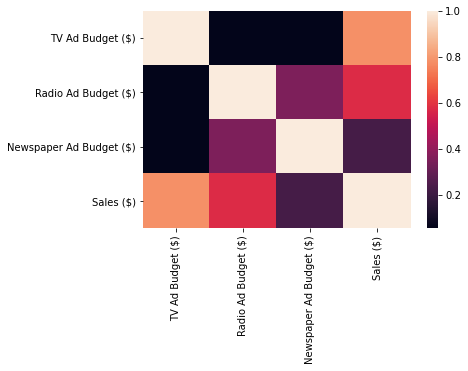

In [12]:
# lets check for correlation
sns.heatmap(budgets_df.corr())

In [13]:
# lets define x and y
X=budgets_df.drop(['Sales ($)'],axis=1)
y=budgets_df['Sales ($)']
print(X.shape)
print(y.shape)


(200, 3)
(200,)


In [14]:
# lets perform train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [16]:
# lets craete model object for linear regression
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [17]:
# lets fit the model
lr_model.fit(X_train,y_train)

LinearRegression()

In [18]:
# predictions on y
y_train_pred=lr_model.predict(X_train)
y_test_pred=lr_model.predict(X_test)

In [19]:
# lets check RMSE value
from sklearn.metrics import mean_squared_error
print('rmse of lr_model on trainig data:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('rmse of lr_model on testing data:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

rmse of lr_model on trainig data: 1.673691044609783
rmse of lr_model on testing data: 1.6611334844530612


In [20]:
# lets check r2 score
print('R2 score:{}'.format(lr_model.score(X_test,y_test)))

R2 score:0.9220737408493859


In [21]:
pd.DataFrame({'Actual y_test': y_test , 'Predicted y_test' : y_test_pred})

,Actual y_test,Predicted y_test
144,11.4,9.964633
9,10.6,12.445183
17,24.4,23.243516
20,18.0,18.057717
45,14.9,15.097093
6,11.8,11.647969
52,22.6,20.668486
91,7.3,4.303952
129,9.7,7.730324
183,26.2,24.154763


In [22]:
# lets import the pickle library
import pickle


In [23]:
# lets create a file to open and write
file=open('lr_model.pkl','wb')
# dump model and close the file
pickle.dump(lr_model,file)
file.close()

In [24]:
# we can test the pickle file 
model = pickle.load(open('lr_model.pkl', 'rb'))

In [25]:
prediction=model.predict([[230.1,37.8,69.2]])

In [26]:
prediction[0]

20.506285286148426